## Лабораторная работа 2
#### Выполнил: Граур Арсений `5130901/10203`

### Упражнение 1

Напишем класс SawtoothSignal волна которого линейно возрастает из -1 до 1, потом падает в -1 и зацикливается.

In [5]:
from ThinkDSP.code.thinkdsp import Sinusoid
from ThinkDSP.code.thinkdsp import normalize, unbias
from ThinkDSP.code.thinkdsp import decorate
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Вот как он звучит

In [6]:
sawtooth = SawtoothSignal().make_wave(duration=1, framerate=40000)
sawtooth.make_audio()

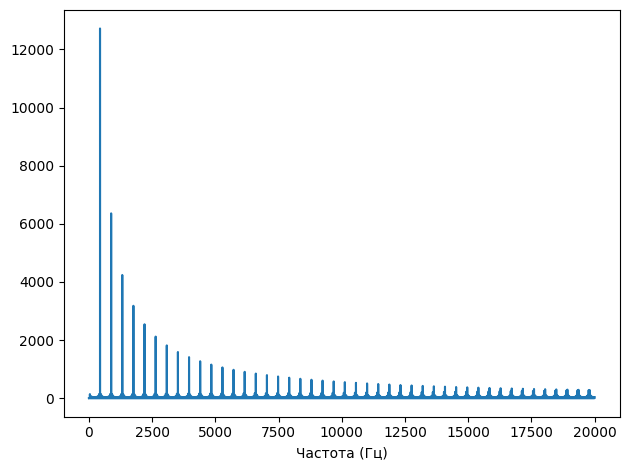

In [8]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Частота (Гц)')


По сравнению с прямоугольной волной, пилообразна убывает похоже, но включает в себя четные и нечетные гармоники.

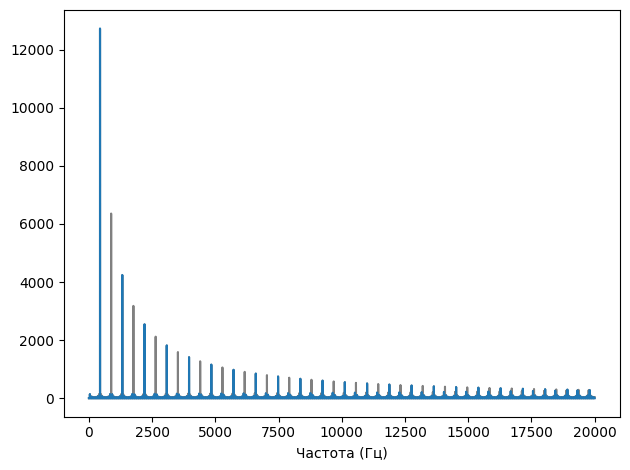

In [11]:
from ThinkDSP.code.thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=1, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Частота (Гц)')

По сравнению с треугольной волной, пилообразная убывает не так быстро

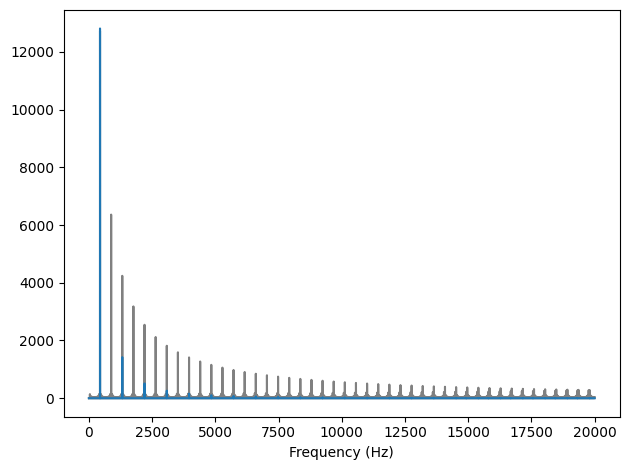

In [12]:
from ThinkDSP.code.thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='gray')
triangle = TriangleSignal(amp=0.79).make_wave(duration=1, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

### Упражнение 2

Создадим прямоугольный сигнал с заданными характеристиками

In [14]:
square = SquareSignal(1500).make_wave(duration=0.5, framerate=10000)

Спектр:

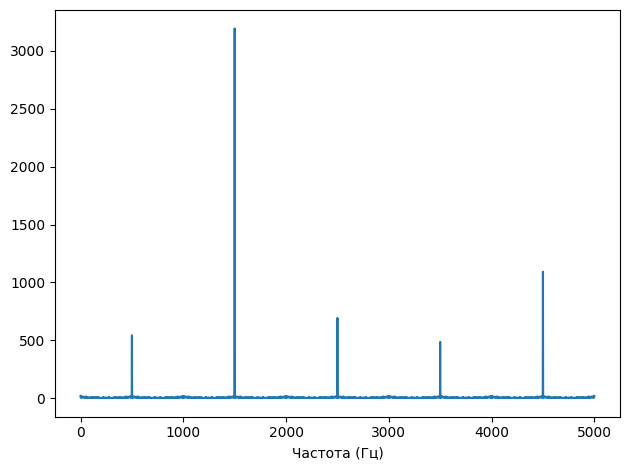

In [15]:
square.make_spectrum().plot()
decorate(xlabel='Частота (Гц)')

In [16]:
square.make_spectrum().peaks()[:10]

[(3193.159023172092, 1500.0),
 (1092.410178952849, 4500.0),
 (693.1089380465382, 2500.0),
 (543.4188494344164, 500.0),
 (486.48885674209333, 3500.0),
 (20.00000000000013, 4000.0),
 (20.000000000000057, 3000.0),
 (20.0, 5000.0),
 (20.0, 0.0),
 (19.999999999999943, 2000.0)]

In [17]:
square.make_audio()

### Упражнение 3

Создадим треугольный сигнал с заданными характеристиками. Выведем его звуковую волну.

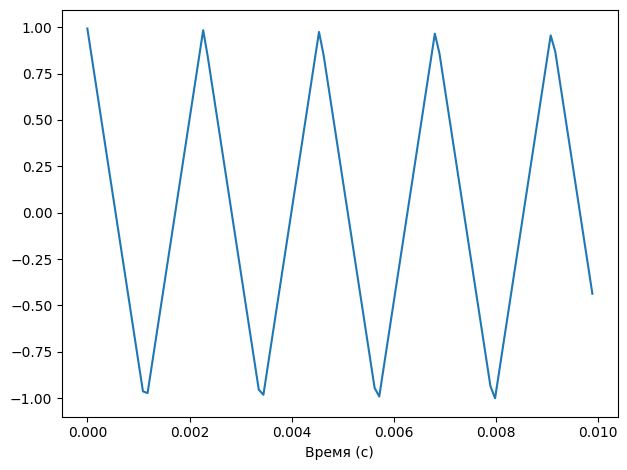

In [18]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Время (с)')

Убедимся, что [0] - компонента с 0-вой частотой.

In [19]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Добавление к компоненте с нулевой частотой соответствует эффекту наложения вертикального отклонения волны

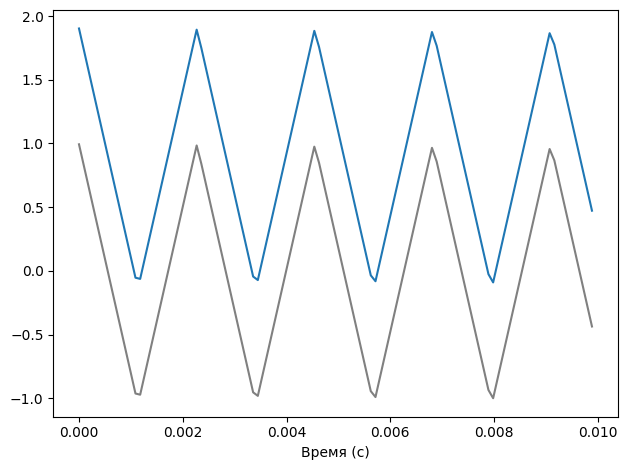

In [20]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Время (с)')

Как видно по графику, высота графика изменилась, то есть он сместился вверх.

### Упражнение 4

Напишем функцию которая модифицирует спектр в соответствии с заданием

In [21]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [22]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Сравним изначальный и измененный спектр

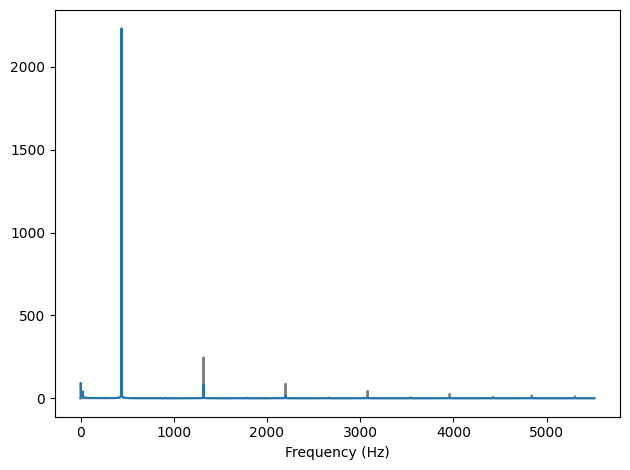

In [23]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

Фильтр ведет себя как low_pass фильтр

In [24]:
filtered = spectrum.make_wave()
filtered.make_audio()

Треугольная волна звучит почти как синусоида

### Упражнение 5

Попробуем сделать требуемый сигнал из пилообразного, который уже имеет все необходимые нам гармоники: и четные, и нечетные.

In [25]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

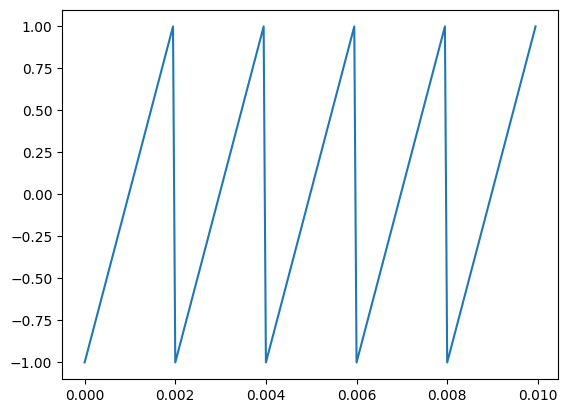

In [28]:
wave.segment(duration=0.01).plot()

Гармоники убывают пропорционально 1/f

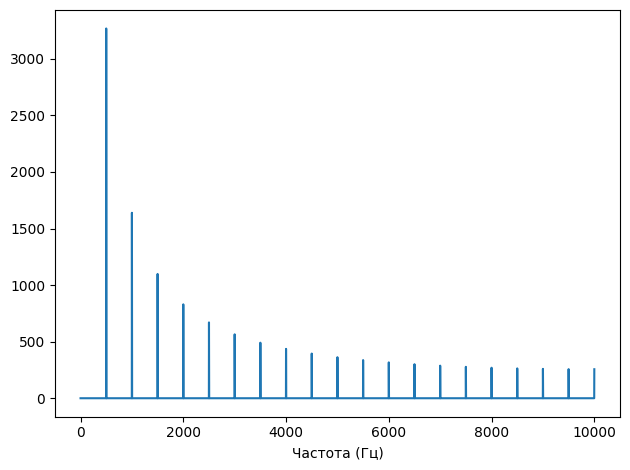

In [26]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Частота (Гц)')

Применим фильтр

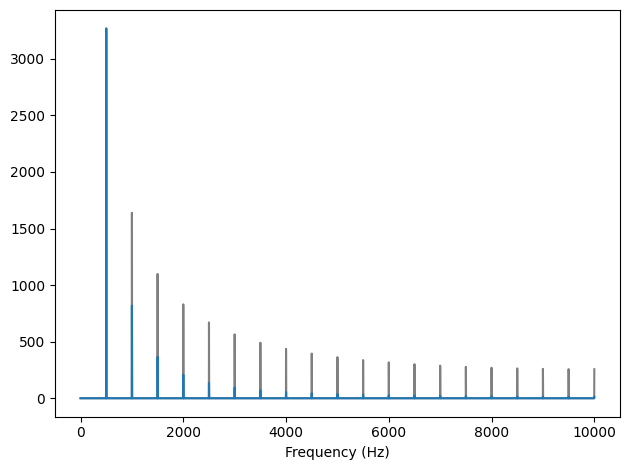

In [27]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

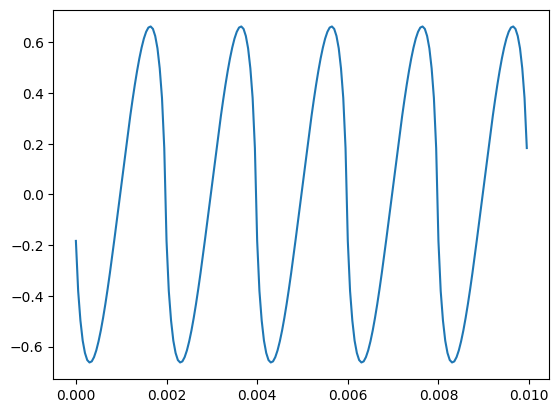

In [31]:
spectrum.make_wave().segment(duration=0.01).plot()

Теперь убывание гармоники пропорционально 1/f^2